In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [37]:
df =pd.read_csv('revenue_prediction.csv')
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [38]:
df = df.drop(columns=['Id','Name'], axis=1)

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No_Of_Item,100.0,49.080,2.237092e+01,18.0,34.75,45.00,57.25,126.0
Order_Placed,100.0,4.086,2.055101e+00,1.0,2.75,3.65,5.10,13.0
Revenue,100.0,4395160.900,2.659932e+06,849870.0,2688328.50,3911401.00,5330084.00,19696939.0


In [40]:
df.isna().sum()

Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [41]:
df.duplicated().sum()

0

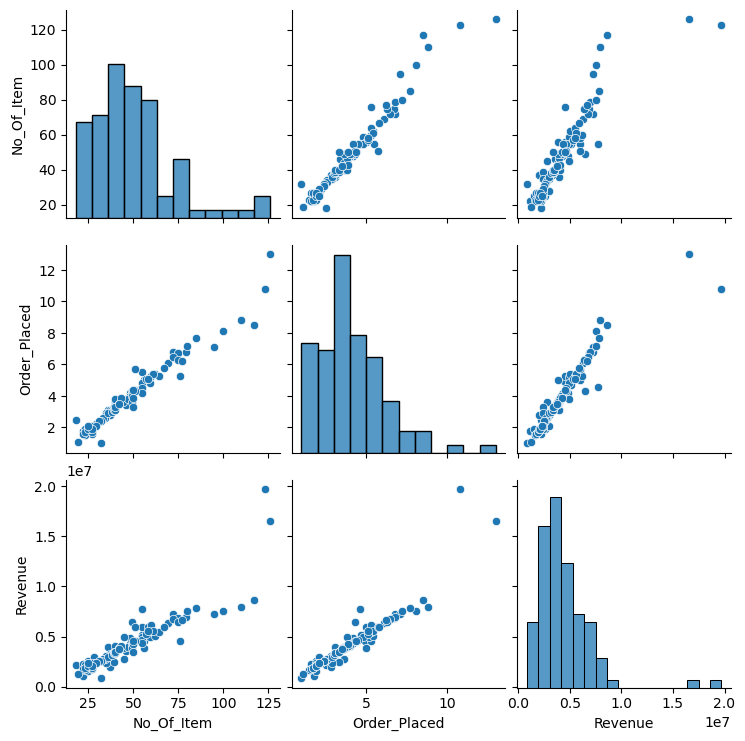

In [42]:
sns.pairplot(df)

<Axes: >

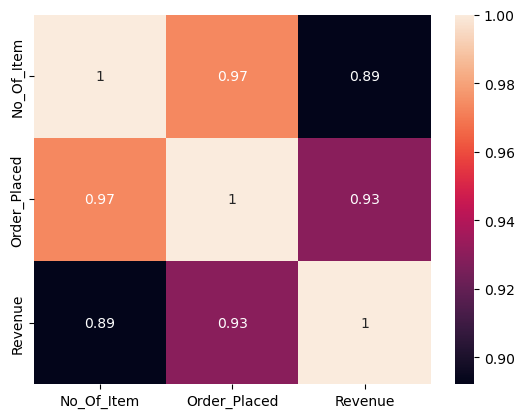

In [43]:
sns.heatmap(df[['No_Of_Item','Order_Placed','Revenue']].corr(), annot=True)

In [44]:
df = pd.get_dummies(df, drop_first=True, dtype=int)

In [53]:
x =df.drop(columns=['Revenue'], axis=1)
y = df['Revenue']

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=42)

In [55]:
ss = StandardScaler()

In [56]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [61]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
print(f"The R squared score is {round(r2_score(y_test,y_pred),2)}") # type: ignore
print(f"The mean squared error is {round(mean_squared_error(y_test,y_pred),2)}") # type: ignore

The R squared score is 0.36
The mean squared error is 1295651386599.2


This is very bad score. Let's try taking only numeric columns from Features. Since there is high correlation as we see from heat map.

In [66]:
x = df[['No_Of_Item','Order_Placed']]
y = df['Revenue']

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=42)

In [68]:
ss = StandardScaler()

In [69]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [70]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
print(f"The R squared score is {round(r2_score(y_test,y_pred),2)}") # type: ignore
print(f"The mean squared error is {round(mean_squared_error(y_test,y_pred),2)}") # type: ignore

The R squared score is 0.84
The mean squared error is 329727960974.51


This is an good score but MSE is very very high. Let us plot some graph to better understand the MSE.

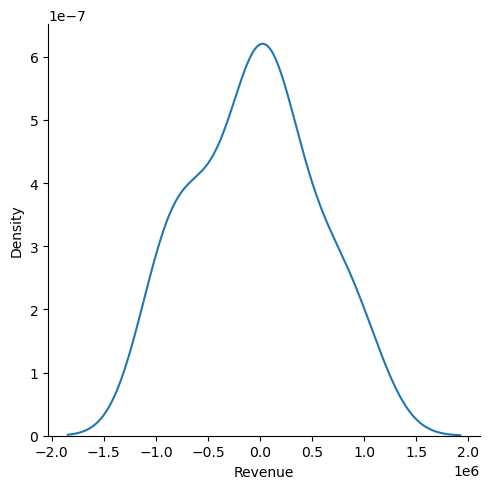

In [74]:
residual = y_test - y_pred
sns.displot(residual,kind='kde')
plt.show()

## Q-Q plot

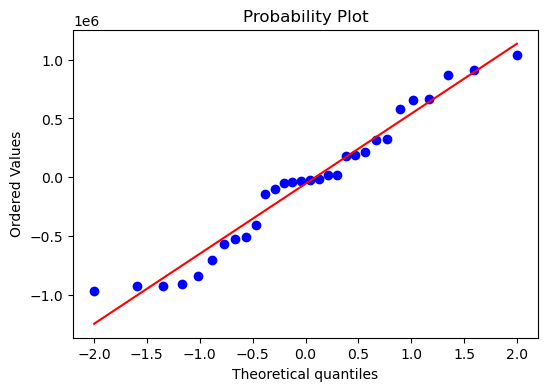

In [75]:
import scipy as sp
fig,ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)
plt.show()

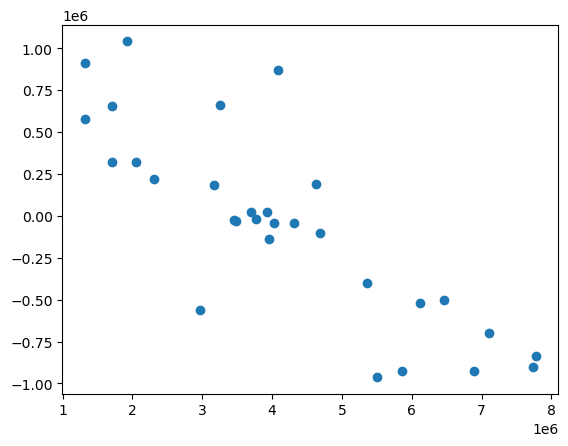

In [76]:
plt.scatter(y_pred,residual)

## Autocorrelations of Residuals


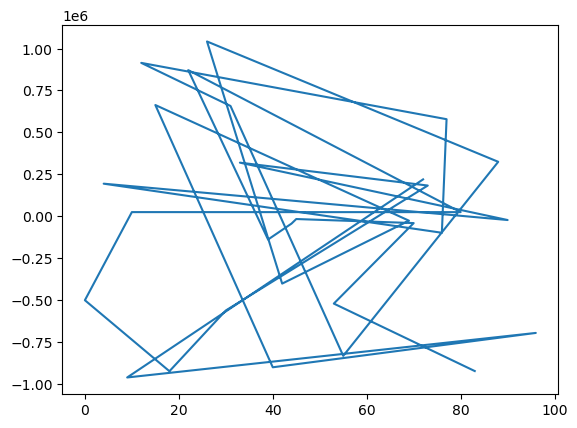

In [77]:
plt.plot(residual)

Basically, either the dataset is incorrect wrt to revenue generated or the dataset size is too small with just 100 records